In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import csv
import seaborn as sns
import itertools
import operator

%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [8]:
name = "womenjean_sales_data"
size_column_name = 'size'
df = pd.read_csv(name+".csv",sep="	")

print ("Reading CSV Completed")

print (df.shape)

Reading CSV Completed
(869928, 28)


In [9]:
users = set()
brands = {}
product_id = set()
G=nx.Graph()
bs = set()
count = 0


for index,rows in df.iterrows():
    if str(rows['brand']).lower() == 'null' or str(rows[size_column_name]).lower() == 'null':
        continue
    product_id.add(rows['product_id'])
    users.add(rows['account_id'])
    count = count + 1
    if rows['brand'].lower() in brands.keys():
        brands[rows['brand'].lower()].add(str(rows[size_column_name]).lower())
    else:
        brands[rows['brand'].lower()] = set()
        brands[rows['brand'].lower()].add(str(rows[size_column_name]).lower())
    
    bs.add(rows['brand'].lower()+"_"+str(rows[size_column_name]).lower())
    if not (G.has_edge(rows['account_id'],rows['brand'].lower()+"_"+str(rows[size_column_name]).lower())):
        G.add_edge(rows['account_id'],rows['brand'].lower()+"_"+str(rows[size_column_name]).lower())

In [12]:
l = list(G.degree(list(users)).values())
plt.hist(l,bins=range(0,max(l)))
plt.yscale('log', nonposy='clip')
plt.title("Degree Distribution of"+name[:-4]+"User Partition")
plt.ylabel("No. Of Nodes")
plt.xlabel("Degree")
plt.savefig('foo.png')
plt.clf()

print ("Rows Iterated: - "+str(count))
print ("Graph Created")

Rows Iterated: - 869928
Graph Created


In [4]:
sparsity = []
bs = list(bs)

print ("Total Products: - "+str(len(product_id)))
print ("Total Brands: - "+str(len(brands)))
print ("Total BSs: - "+str(len(bs)))
print ("Total Users: - "+str(len(users)))
print ("Total Number of Edges: - "+str(G.number_of_edges()))

Total Products: - 62777
Total Brands: - 745
Total BSs: - 3882
Total Users: - 451251
Total Number of Edges: - 688766


In [5]:
G2=nx.Graph()

for pair in itertools.combinations(bs,2):
        temp = len(set(G.neighbors(pair[0])).intersection(G.neighbors(pair[1])))
        if (temp > 0):
            G2.add_edge(pair[0],pair[1],weight=temp)
        sparsity.append(temp)
        

print (len(sparsity))

print ("Showing Graph")

7533021
Showing Graph


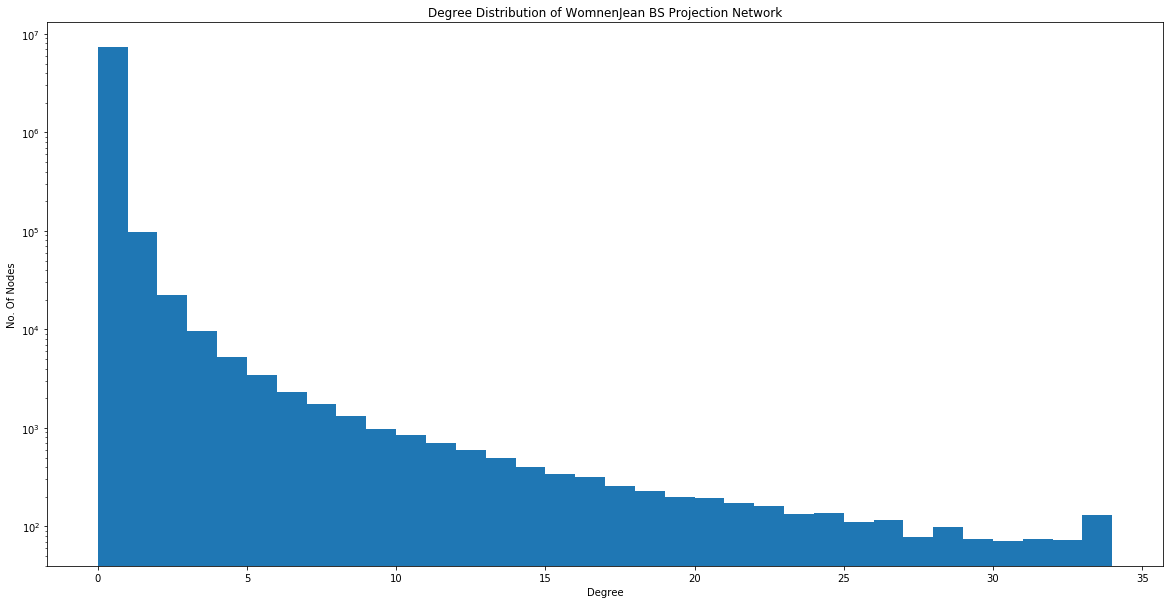

In [53]:
plt.hist(sparsity,bins=range(0, 35))
plt.yscale('log', nonposy='clip')
plt.title("Degree Distribution of WomnenJean BS Projection Network")
plt.ylabel("No. Of Nodes")
plt.xlabel("Degree")
plt.clf()
plt.show()

In [86]:
centrality = nx.eigenvector_centrality(G2)
sorted_x = sorted(centrality.items(), key=operator.itemgetter(1),reverse=True)
max_w = -1
min_w = 100
sum_w = 0
for items in sorted_x:
    if items[1] > max_w:
        max_w = items[1]
    if items[1] < min_w:
        min_w = items[1]
    sum_w = sum_w + items[1]

print(str(min_w)+"\n")
print(str(max_w)+"\n")
print(str(sum_w/(len(l)*1.0))+"\n")

2.8234155414137776e-34

0.3554972903532339

8.431584854907657e-05



In [65]:
print(nx.average_clustering(G2))

0.5432016849019272


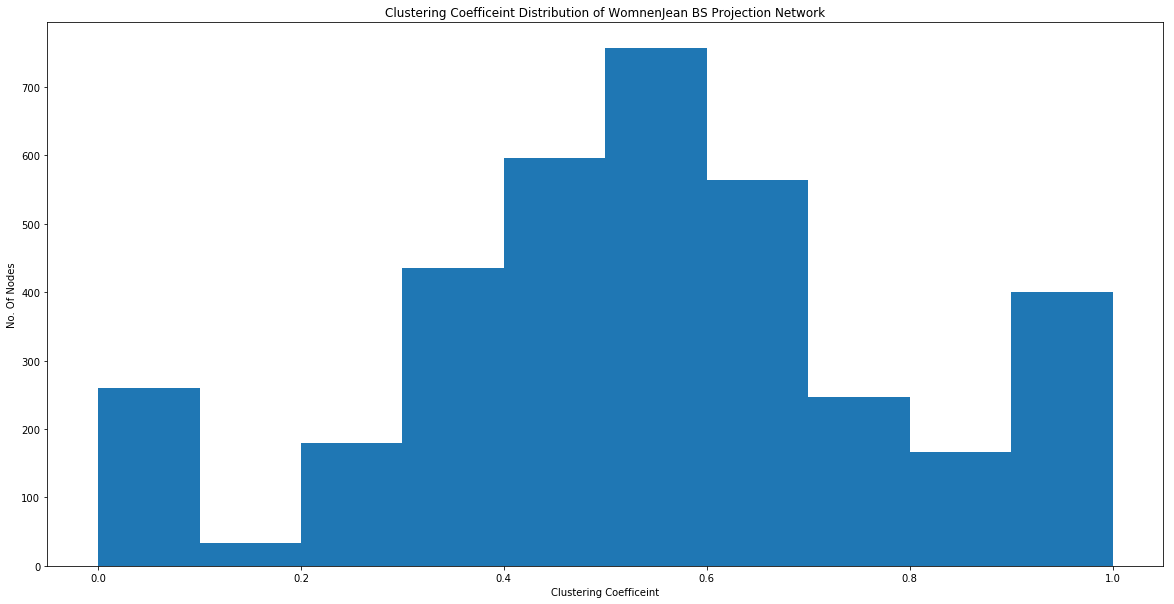

In [57]:
clustering_coeff_nodes = nx.clustering(G2)

clustering_dist = clustering_coeff_nodes.values()
plt.hist(list(clustering_dist))
plt.title("Clustering Coefficeint Distribution of WomnenJean BS Projection Network")
plt.ylabel("No. Of Nodes")
plt.xlabel("Clustering Coefficeint")
plt.show()
    

[1, 1, 1, 1]


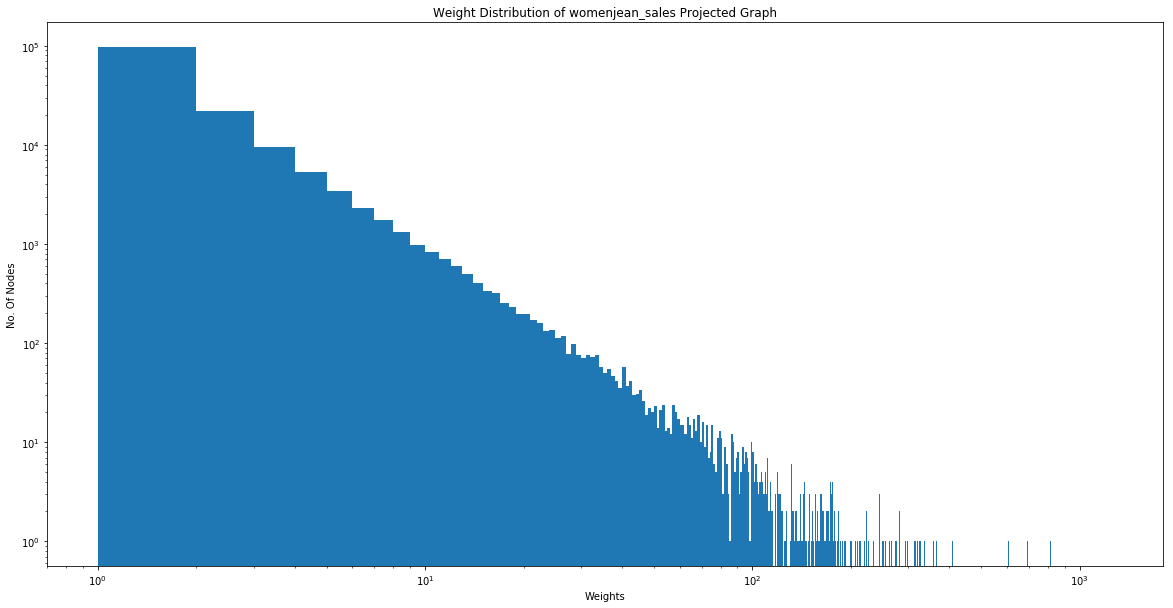

In [16]:
l = list(G2.edges_iter(data='weight'))
l2 = []
for items in l:
    l2.append(items[2])
plt.hist(l2,bins=range(0,max(l2)))
plt.yscale('log', nonposy='clip')
plt.xscale('log', nonposy='clip')
plt.title("Weight Distribution of "+name[:-5]+" Projected Graph")
plt.ylabel("No. Of Nodes")
plt.xlabel("Weights")